<a href="https://colab.research.google.com/github/PankajBGadge/The-Global-Terrorism-Database-Analysis/blob/main/Pankaj_B_GadgeGlobal_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b>Problem Statement: Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>


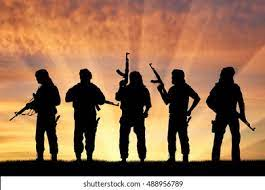

After “9/11” attacks which was shorthand for four coordinated terrorist attacks carried out by al-Qaeda, an Islamist extremist group, that occurred on the morning of September 11, 2001, all the peoples understood terrorism is not part of one region but it is global threat that knows no border, nationality or religion, and is a challenge that the international community must tackle together.
The analysis and prediction of terrorist attacks on terrorist groups provide valuable information for antiterrorism and terrorism prevention operations, to improve the security and stability of social life

# **Import required Libraries**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt

# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Dataset**
If we load large dataset directly,it create error when running. So we run dataset using encoding.

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Capstone project EDA/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Data Inspection**

In [ ]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**As you see all the columns in the dataset are not recoverable so we used display max columns to display all the columns to analyze **

In [ ]:
pd.set_option('display.max_columns', 200)
dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

# There are 135 columns in the dataset which is very large, so we only keep important coulmn which need for analysis. 

# **Rename some columns which we are going to use for analysis.**

In [ ]:
dataset.rename(columns = {'iyear':'Year','imonth':'Month',	'iday':'Day', 'country_txt':'Country', 'region_txt':'Region','provstate':'State',	'city':'City','latitude':'Latitude',	'longitude':'Longitude',	'attacktype1_txt':'Attack_Type', 'summary':'Summary', 'targtype1_txt':'Target', 'weaptype1_txt':'Weapon_type', 'nkill':'Kills',  'nwound':'Wound', 'success':'Success', 'motive':'Motive','gname':'Terrorist_Group'	}, inplace = True)

# **Variable Description**

'Year': Year of terrorist attacks,

'Month':Month of terrorist attacks

'Day':Date of month of terrorist attacks

'Country':Contry of terrorist attacks

'Region':Region of terrorist attacks

'State':State of terrorist attacks

'City': City of terrorist attacks

'Latitude':Latitude of terrorist attacks

'Longitude':Longitude of terrorist attacks

'Attack_Type':Type of terrorist attacks

'Summary':A brief statement or account of the main points of terrorist attacks.

'Target': A person, object, or place selected as the aim of an attack.

'Weapon_type':Weapon used in terrorist attacks

'Kills': Number of people killed in terrorist attacks

'Wound': Number of people wounded in terrorist attacks

'Motive': Motive of terrorist attacks

'Terrorist_Group': Name of terrorist group 


In [ ]:
terrorist_data=dataset[['Year','Month','Day','Country','Region','State','City','Latitude','Longitude','Attack_Type','Summary','Target','Weapon_type','Kills','Wound','Success','Motive','Terrorist_Group']]

In [ ]:
terrorist_data.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Attack_Type,Summary,Target,Weapon_type,Kills,Wound,Success,Motive,Terrorist_Group
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,NaN,Private Citizens & Property,Unknown,1.0,0.0,1,NaN,MANO-D
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),NaN,Government (Diplomatic),Unknown,0.0,0.0,1,NaN,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,NaN,Journalists & Media,Unknown,1.0,0.0,1,NaN,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,Government (Diplomatic),Explosives,NaN,NaN,1,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,Government (Diplomatic),Incendiary,NaN,NaN,1,NaN,Unknown


# **There is some null value present in our dataset like in latitude,longitude,summary and motive**
# Use dropna to drop rows with all null values, There is no rows with all NA value.

In [ ]:
terrorist_data.dropna(how='all')

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Attack_Type,Summary,Target,Weapon_type,Kills,Wound,Success,Motive,Terrorist_Group
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,NaN,Private Citizens & Property,Unknown,1.0,0.0,1,NaN,MANO-D
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),NaN,Government (Diplomatic),Unknown,0.0,0.0,1,NaN,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,NaN,Journalists & Media,Unknown,1.0,0.0,1,NaN,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,Government (Diplomatic),Explosives,NaN,NaN,1,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,Government (Diplomatic),Incendiary,NaN,NaN,1,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,Armed Assault,12/31/2017: Assailants opened fire on a Somali...,Military,Firearms,1.0,2.0,1,NaN,Al-Shabaab
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,Bombing/Explosion,12/31/2017: Assailants launched mortars at the...,Military,Explosives,2.0,7.0,1,NaN,Muslim extremists
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,12/31/2017: Assailants set fire to houses in K...,Private Citizens & Property,Incendiary,0.0,0.0,1,NaN,Bangsamoro Islamic Freedom Movement (BIFM)
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,Bombing/Explosion,12/31/2017: Assailants threw a grenade at a Fo...,Government (General),Explosives,0.0,0.0,0,NaN,Unknown


In [ ]:
terrorist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   State            181270 non-null  object 
 6   City             181257 non-null  object 
 7   Latitude         177135 non-null  float64
 8   Longitude        177134 non-null  float64
 9   Attack_Type      181691 non-null  object 
 10  Summary          115562 non-null  object 
 11  Target           181691 non-null  object 
 12  Weapon_type      181691 non-null  object 
 13  Kills            171378 non-null  float64
 14  Wound            165380 non-null  float64
 15  Success          181691 non-null  int64  
 16  Motive           50561 non-null   obje

In [ ]:
terrorist_data.describe() 

,Year,Month,Day,Latitude,Longitude,Kills,Wound,Success
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,0.889598
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,0.313391
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,1.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,1.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000


# **Exploratory Data Analysis**
Count plots and bar plots are two types of visualizations that Seaborn calls "categorical plots". Categorical plots involve a categorical variable, which is a variable that consists of a fixed, typically small number of possible values, or categories. These types of plots are commonly used when we want to make comparisons between different groups.

In [ ]:
numeric_features = terrorist_data.describe().columns
numeric_features

Index(['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Kills', 'Wound',
       'Success'],
      dtype='object')

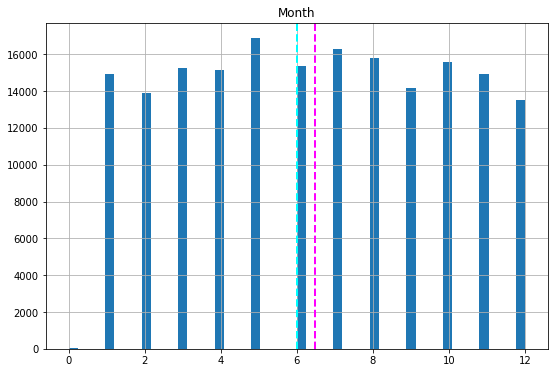

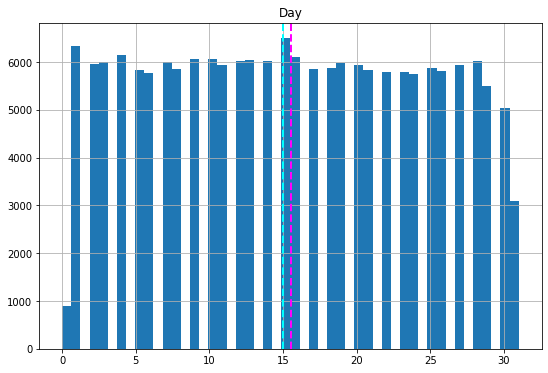

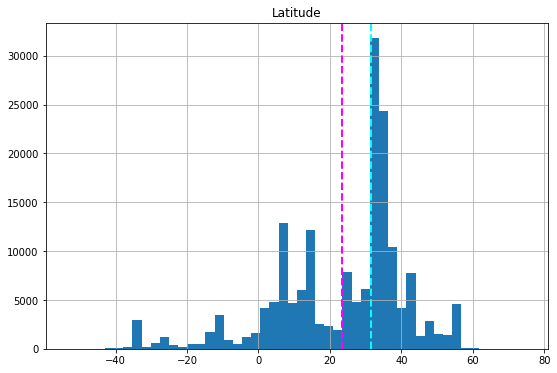

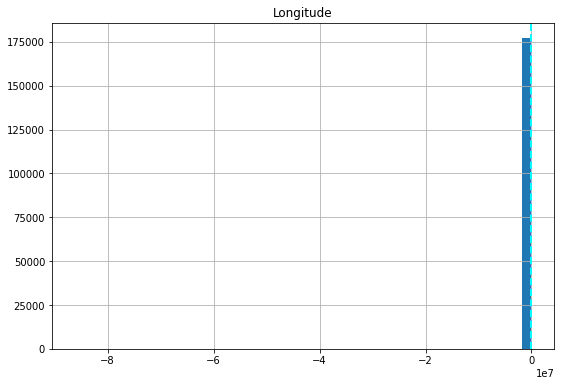

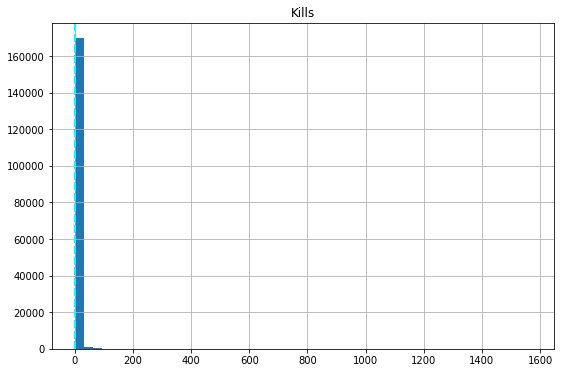

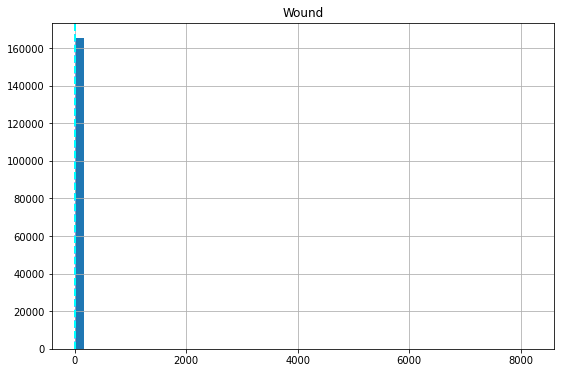

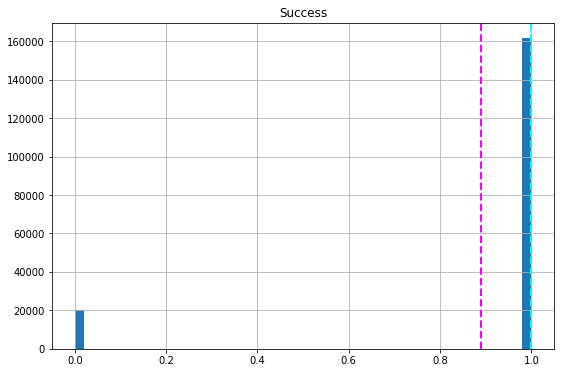

In [ ]:
 #plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = terrorist_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# This represents the distribution of numeric data on each series in the dataframe.

# **Correlation**

# Correlation heatmap shows how much related one parameter to other in the dataset.

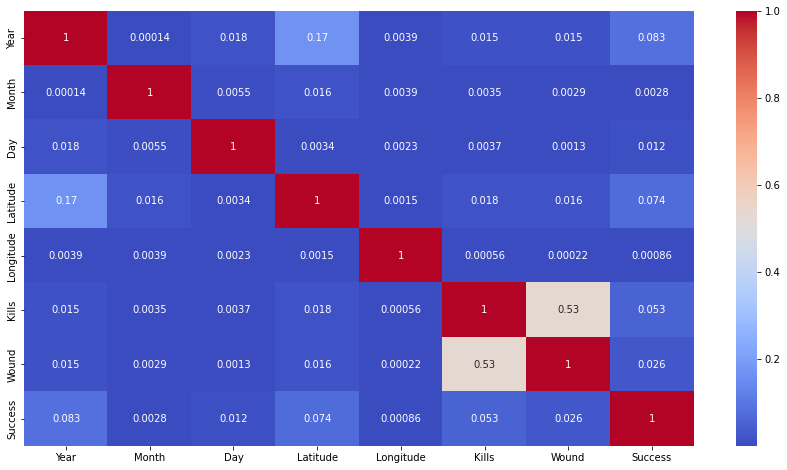

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = terrorist_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# Correlation graph shows two features wound and kills are just correlated but not highly correlated.SO we cannot drop them.

# **Terrorist activities with years**

In [ ]:
terrorist_data['Year'].value_counts().head(10)


2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

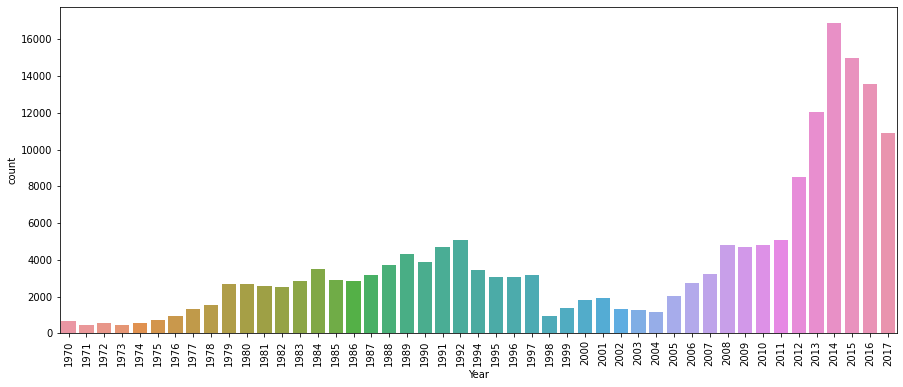

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorist_data['Year'])
plt.xticks(rotation=90)

# Graph represents   terrorist activities from 1970 starts to incresing ,attained maximum value at 1992 and then again starts decreasing upto 2004.From 2005 it again starts increasing and attained maximum value at 2014. 
# 16903 numbers terrorist attacks took place in only one year i.e.2014 which was maximum upto 2017.

# **Terrorist Group**

In [ ]:
terrorist_data['Terrorist_Group'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [ ]:

terrorist_data['Terrorist_Group'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Terrorist_Group, dtype: int64

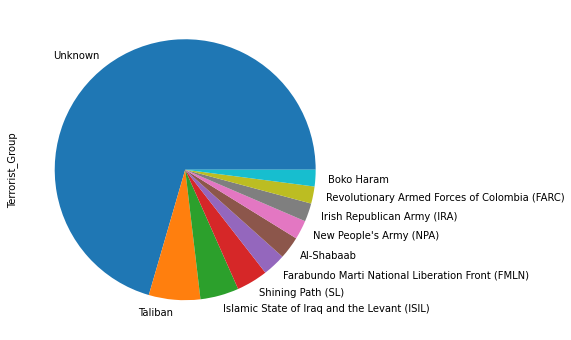

In [ ]:
terrorist_data['Terrorist_Group'].value_counts().head(10).plot.pie(figsize=(6, 6))

# Graph shows that there was unknown groups that take part in most of the terrorist activities. While Taliban and ISIS  was the biggest Terrorist Group which take parts in most of the  terrorist activities.

In [ ]:
terrorist_data.groupby(['Year','Region','Country','Terrorist_Group'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,,,Kills,Attack_Type
Year,Region,Country,Terrorist_Group,,
2014,Middle East & North Africa,Iraq,Unknown,2710,2764
2013,Middle East & North Africa,Iraq,Unknown,2386,2421
2016,Middle East & North Africa,Iraq,Unknown,2063,2090
2013,South Asia,Pakistan,Unknown,1824,1872
2015,Middle East & North Africa,Iraq,Unknown,1721,1740
2014,South Asia,Pakistan,Unknown,1595,1632
2012,South Asia,Pakistan,Unknown,1279,1302
2017,Middle East & North Africa,Iraq,Unknown,1271,1284
2011,Middle East & North Africa,Iraq,Unknown,1209,1213


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


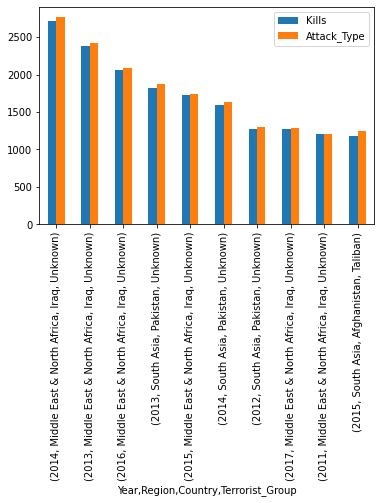

In [ ]:
terrorist_data.groupby(['Year','Region','Country','Terrorist_Group'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10).plot(kind='bar')

# **Attacks type**

In [ ]:
terrorist_data['Attack_Type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

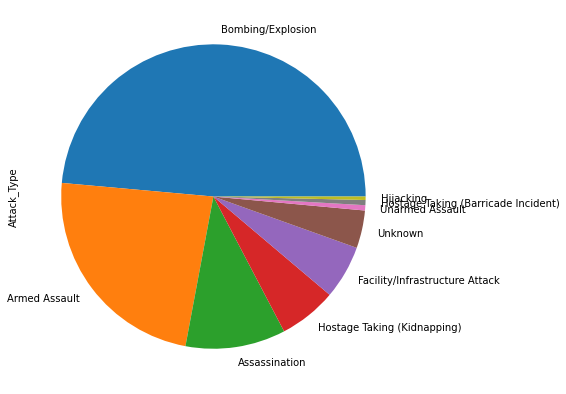

In [ ]:
terrorist_data['Attack_Type'].value_counts().head(10).plot.pie(figsize=(7, 7))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

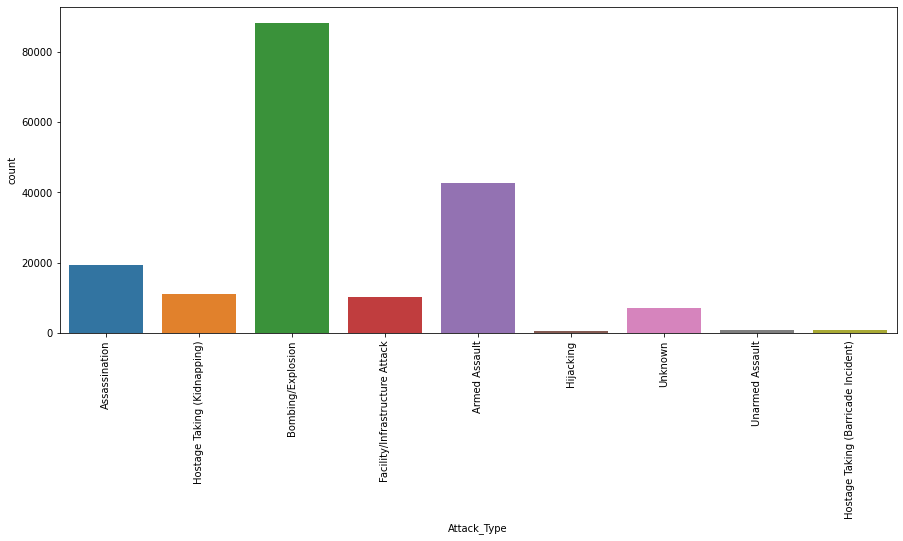

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorist_data['Attack_Type'])
plt.xticks(rotation=90)

# Since from the above chart and statistical analysis its clear that Bombing/Explosion method was mostly used by terrorist

# **Weapon type**

In [ ]:
terrorist_data['Weapon_type'].value_counts().head(10)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: Weapon_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

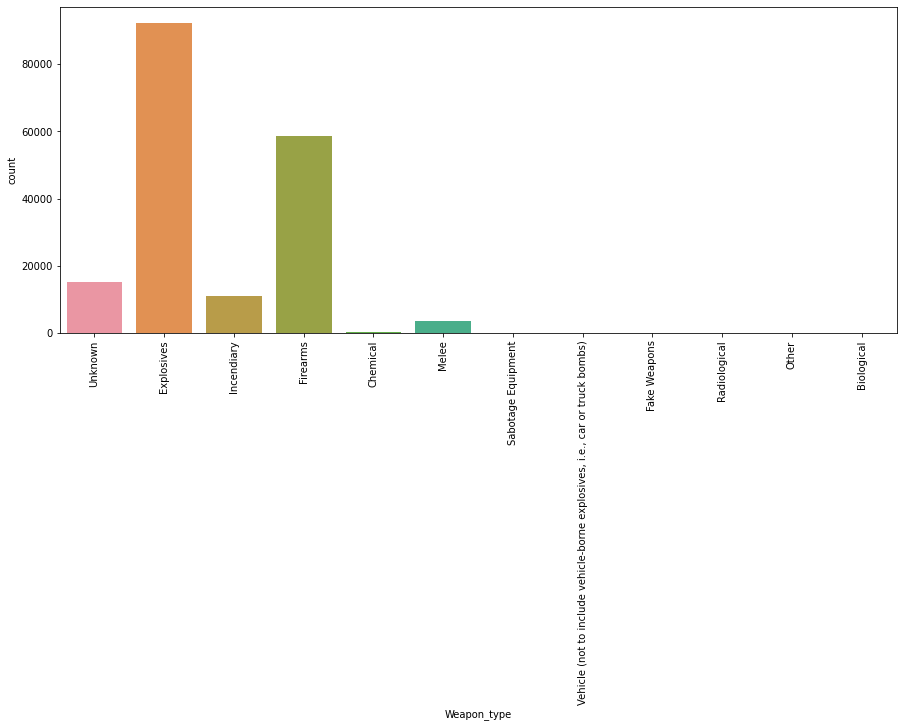

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorist_data['Weapon_type'])
plt.xticks(rotation=90)

In [ ]:
terrorist_data.groupby(['Year','Region','Country','Weapon_type'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Kills  Attack_Type
Year Region                     Country     Weapon_type                    
2014 Middle East & North Africa Iraq        Explosives    2942         2990
2016 Middle East & North Africa Iraq        Explosives    2719         2776
2013 Middle East & North Africa Iraq        Explosives    2216         2237
2015 Middle East & North Africa Iraq        Explosives    2215         2248
2017 Middle East & North Africa Iraq        Explosives    1861         1882
2013 South Asia                 Pakistan    Explosives    1452         1455
2014 South Asia                 Pakistan    Explosives    1282         1284
2012 Middle East & North Africa Iraq        Explosives    1136         1146
     South Asia                 Pakistan    Explosives    1105         1105
2014 South Asia                 Afghanistan Explosives    1079         1083

# From the above graph it is clear that explosives and firearms were mostly used by terrorist for terrorist attacks.

# **Target**

In [ ]:
terrorist_data['Target'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

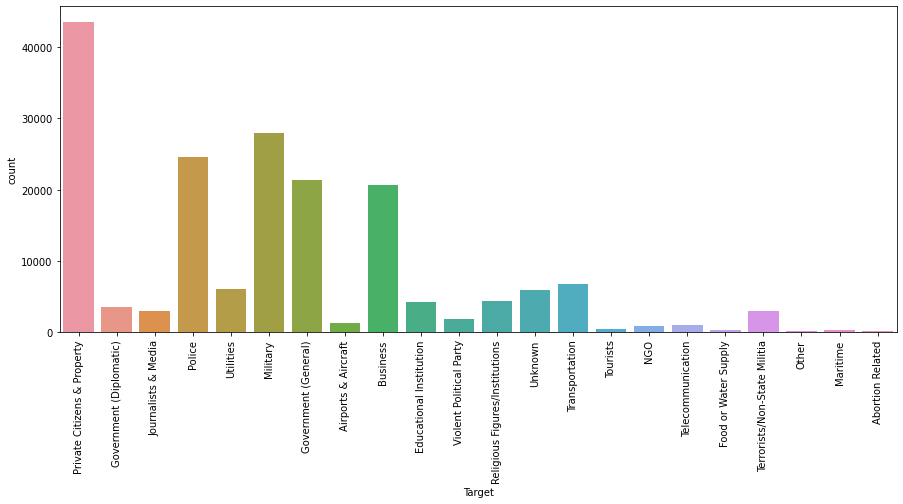

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorist_data['Target'])
plt.xticks(rotation=90)

In [ ]:
terrorist_data.groupby(['Year','Region','Country','Target'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,,,Kills,Attack_Type
Year,Region,Country,Target,,
2016,Middle East & North Africa,Iraq,Private Citizens & Property,1381,1458
2014,Middle East & North Africa,Iraq,Private Citizens & Property,1249,1307
2015,Middle East & North Africa,Iraq,Private Citizens & Property,997,1059
2013,Middle East & North Africa,Iraq,Private Citizens & Property,858,873
2017,Middle East & North Africa,Iraq,Private Citizens & Property,817,894
2014,Middle East & North Africa,Iraq,Police,738,770
2015,South Asia,Afghanistan,Police,687,707
2014,Middle East & North Africa,Iraq,Military,678,713
2013,Middle East & North Africa,Iraq,Police,658,662


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


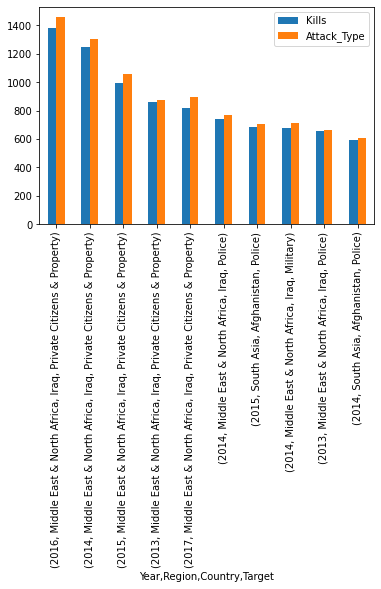

In [ ]:
terrorist_data.groupby(['Year','Region','Country','Target'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10).plot(kind='bar')

# From the above chart it is clear that Private citizen and property was mostly targeted.

# **Number of Casualities vs Killed people in different countries with year**

In [ ]:
fig = px.scatter_geo(terrorist_data,terrorist_data.Wound,terrorist_data.Kills,hover_name="Country",locations="Country",locationmode='country names',animation_frame='Year',animation_group='Country', 
                    color='Attack_Type',range_color=[0,1] ,labels={'Kills':'Deaths','Wound':'Casualities'})
fig.show()

# **Analysis of terrorist attacks by country, city and region**

In [ ]:
terrorism=terrorist_data.groupby(['Country'],as_index=False).count()

In [ ]:
max_count=terrorism['Year'].max()
max_id=terrorism['Year'].idxmax()
max_name=terrorism['Country'][max_id]
min_count=terrorism['Year'].min()
min_id=terrorism['Year'].idxmin()
min_name=terrorism['Country'][min_id]

In [ ]:
print(max_name,'has suffered the maximum number of terrorist attacks of',max_count)
print(min_name,'has suffered the minimum number of terrorist attacks of',min_count)

Iraq has suffered the maximum number of terrorist attacks of 24636
Andorra has suffered the minimum number of terrorist attacks of 1


In [ ]:
terrorist_data.groupby(['Country','Region'])['Attack_Type'].count().sort_values(ascending=False).head(10)

Country         Region                     
Iraq            Middle East & North Africa     24636
Pakistan        South Asia                     14368
Afghanistan     South Asia                     12731
India           South Asia                     11960
Colombia        South America                   8306
Philippines     Southeast Asia                  6908
Peru            South America                   6096
El Salvador     Central America & Caribbean     5320
United Kingdom  Western Europe                  5235
Turkey          Middle East & North Africa      4292
Name: Attack_Type, dtype: int64

<function matplotlib.pyplot.show>

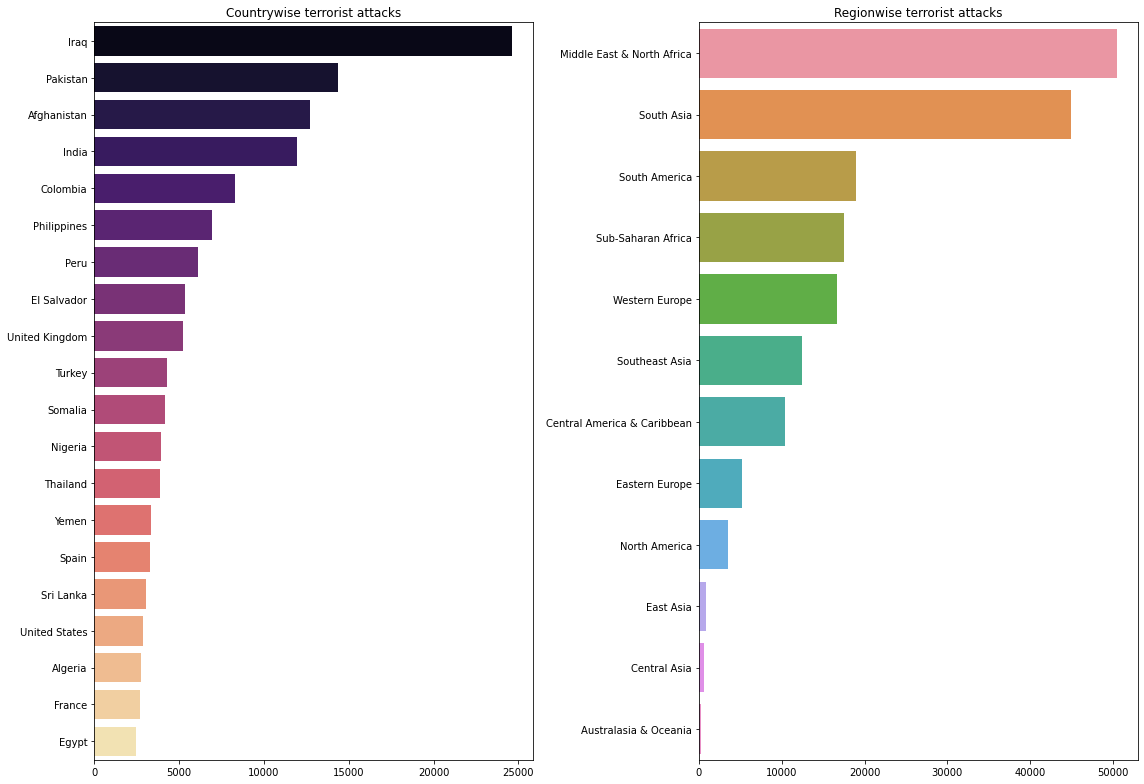

In [ ]:

fig,axes=plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x=terrorist_data['Country'].value_counts()[:20].values,y=terrorist_data['Country'].value_counts()[:20].index,
ax=axes[0],palette='magma');
axes[0].set_title('Countrywise terrorist attacks')
sns.barplot(x=terrorist_data['Region'].value_counts().values,y=terrorist_data['Region'].value_counts().index,
ax=axes[1])
axes[1].set_title('Regionwise terrorist attacks')
fig.tight_layout()
plt.show

# Above chart and statistical analysis, we see the number of attacks from terrorism by country and region. Most of the terrorist attacks occurred in the Middle East & North Africa. Less than 2% of terrorist attacks were in Central Asia, East Asia, Central America and Caribbean the Americas and Australia and Oceania combined. While Iraq has suffered the maximum number of terrorist attacks of 24636 whereas Andorra has suffered the minimum number of terrorist attacks of 1

In [ ]:
terrorist_data['City'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

In [ ]:
terrorist_data.groupby(['Year','Region','Country','City'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,,,Kills,Attack_Type
Year,Region,Country,City,,
2015,Middle East & North Africa,Iraq,Baghdad,993,1000
2016,Middle East & North Africa,Iraq,Baghdad,970,986
2014,Middle East & North Africa,Iraq,Baghdad,889,898
2013,Middle East & North Africa,Iraq,Baghdad,629,639
1995,South Asia,Pakistan,Karachi,614,614
2010,Middle East & North Africa,Iraq,Baghdad,586,586
2011,Middle East & North Africa,Iraq,Baghdad,501,501
2009,Middle East & North Africa,Iraq,Baghdad,457,458
2008,Middle East & North Africa,Iraq,Baghdad,453,456


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



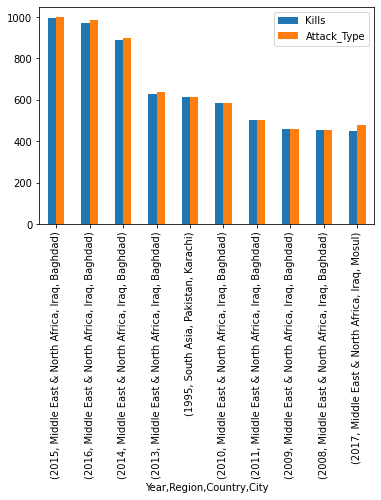

In [ ]:

terrorist_data.groupby(['Year','Region','Country','City'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10).plot(kind='bar')


# This is also true when we look at the city, rather than the country. Bagdad and Karachi was most suffered cities of terrorist attacks. As we will see in the following section, not only is there a strong regional focus but this is also heavily concentrated in only a few cities within these regions

# Terrorism is often regionally-focused. But within these regions, it’s also concentrated within specific countries. Middle East Asia and South Asia had by far the largest number of deaths particularly in Iraq (78589 peoples), Pakistan (23822 peoples) and Afghanistan(39384 peoples)  was killed during 1970 to 2017.

# **Highest number of death casulaties with country & year due to terrorist attacks**

In [ ]:
terrorist_data.groupby(['Year'])['Kills'].count().sort_values(ascending=False).head(10)

Year
2014    15881
2015    14160
2016    12809
2013    11685
2017    10285
2012     8314
2011     5048
1992     5048
2010     4821
2008     4740
Name: Kills, dtype: int64

<function matplotlib.pyplot.show>

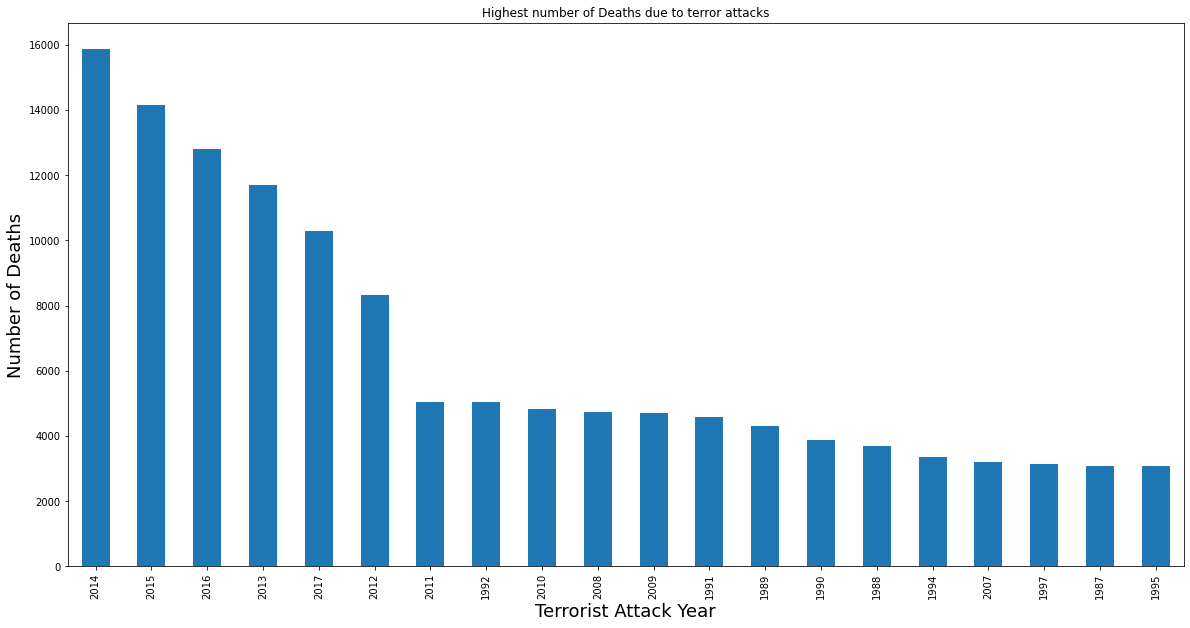

In [ ]:
plt.subplots(figsize=(20,10))
terrorist_data.groupby(['Year'])['Kills'].count().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Highest number of Deaths due to terror attacks')
plt.xlabel('Terrorist Attack Year',fontsize=18)
plt.ylabel('Number of Deaths',fontsize=18)
plt.xticks(rotation=90)
plt.show

# Graph shows that number of death casualties increases by number of years.
# From 2012-2017, just 6 years it almost increases by 42 % of total death casualties from last 70 years.

# **Terrorism Analysis in India**
# India continues to face a number of terror attacks from Islamic groups in Kashmir, Sikh separatists in Punjab, and secessionist groups in Assam.

# *Most Affected Cities by Terrorism*

In [ ]:
group_country=terrorist_data.groupby('Country')
India=group_country.get_group('India')

# Terrorist activities in India from last 70 years.

In [ ]:
India['Year'].value_counts().head(10)

2016    1025
2017     966
2015     884
2014     860
2013     694
2009     672
2010     663
2011     645
2012     611
2008     534
Name: Year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

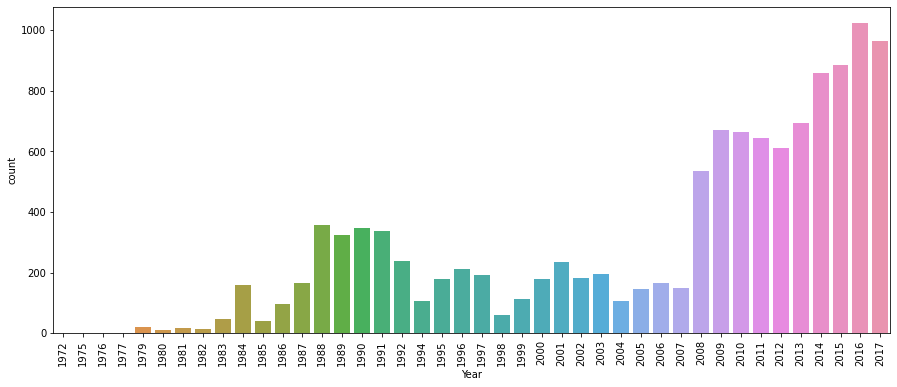

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(India['Year'])
plt.xticks(rotation=90)

In [ ]:
India['City'].value_counts().head(10)

Srinagar     658
Unknown      624
Imphal       426
New Delhi    157
Amritsar     138
Sopore       102
Ludhiana      77
Guwahati      77
Anantnag      76
Jammu         57
Name: City, dtype: int64

In [ ]:
India.groupby(['Year','State','City'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,,Kills,Attack_Type
Year,State,City,,
1990,Jammu and Kashmir,Srinagar,103,103
1984,Punjab,Unknown,71,73
2016,Manipur,Imphal,49,50
2009,Manipur,Imphal,48,48
1992,Jammu and Kashmir,Srinagar,46,46
1996,Jammu and Kashmir,Srinagar,43,55
2008,Manipur,Imphal,43,44
2012,Manipur,Imphal,41,42
1995,Jammu and Kashmir,Srinagar,39,39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



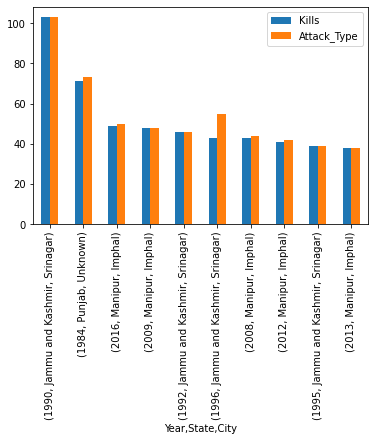

In [ ]:
India.groupby(['Year','State','City'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10).plot(kind='bar')

In [ ]:
India.groupby(['Year','State','Terrorist_Group'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Kills  \
Year State             Terrorist_Group                                         
2017 Jammu and Kashmir Unknown                                           172   
2016 Jammu and Kashmir Unknown                                           152   
     Chhattisgarh      Maoists                                           151   
2010 West Bengal       Communist Party of India - Maoist (CPI-Maoist)    138   
2015 Chhattisgarh      Maoists                                           135   
2017 Chhattisgarh      Maoists                                           117   
2001 Jammu and Kashmir Unknown                                           110   
1991 Punjab            Sikh Extremists                                    93   
2011 Jharkhand         Communist Party of India - Maoist (CPI-Maoist)     92   
2009 West Bengal       Communist Party of India - Maoist (CPI-Maoist)     88   

                                                                       Attack_Type  
Year State             Terrorist_Group                                              
2017 Jammu and Kashmir Unknown                                                 172  
2016 Jammu and Kashmir Unknown                                                 153  
     Chhattisgarh      Maoists                                                 154  
2010 West Bengal       Communist Party of India - Maoist (CPI-Maoist)          138  
2015 Chhattisgarh      Maoists                                                 138  
2017 Chhattisgarh      Maoists                                                 118  
2001 Jammu and Kashmir Unknown                                                 110  
1991 Punjab            Sikh Extremists                                          93  
2011 Jharkhand         Communist Party of India - Maoist (CPI-Maoist)           92  
2009 West Bengal       Communist Party of India - Maoist (CPI-Maoist)           88

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



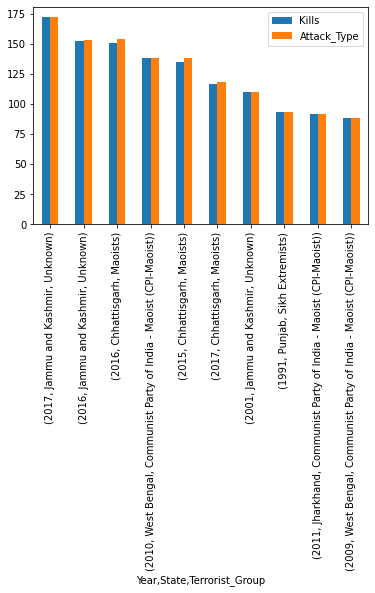

In [ ]:
India.groupby(['Year','State','Terrorist_Group'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10).plot(kind='bar')

In [ ]:
India.groupby(['Terrorist_Group'])['Kills'].count().sort_values(ascending=False).head(10)

Terrorist_Group
Unknown                                           4191
Communist Party of India - Maoist (CPI-Maoist)    1861
Maoists                                           1366
Sikh Extremists                                    703
United Liberation Front of Assam (ULFA)            350
Hizbul Mujahideen (HM)                             199
Lashkar-e-Taiba (LeT)                              186
National Democratic Front of Bodoland (NDFB)       172
Garo National Liberation Army                      153
Muslim Separatists                                 118
Name: Kills, dtype: int64

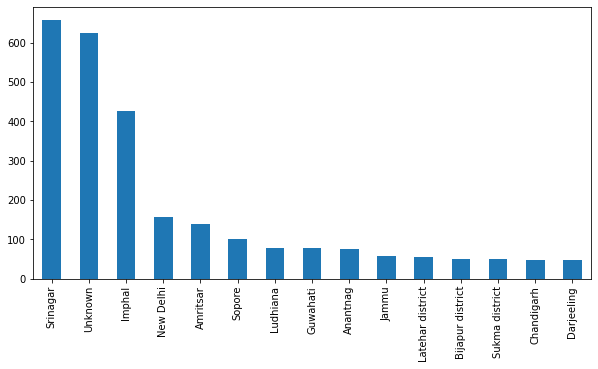

In [ ]:
India['City'].value_counts().nlargest(15).plot(kind='bar',figsize=(10,5))
plt.show()

# From the above chart it is clear that Shrinagar was mostly suffered city due to terrorist attacks.

<function matplotlib.pyplot.show>

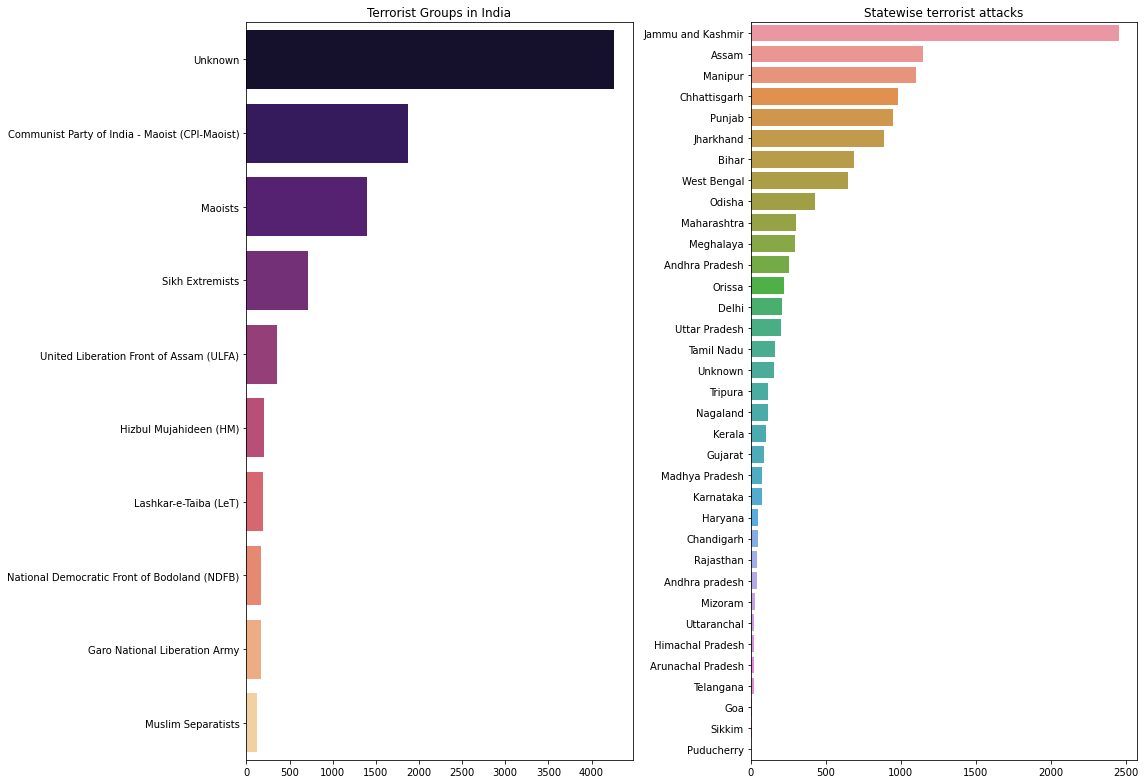

In [ ]:
fig,axes=plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x=India['Terrorist_Group'].value_counts()[:10].values,y=India['Terrorist_Group'].value_counts()[:10].index,
ax=axes[0],palette='magma');
axes[0].set_title('Terrorist Groups in India')
sns.barplot(x=India['State'].value_counts().values,y=India['State'].value_counts().index,
ax=axes[1])
axes[1].set_title('Statewise terrorist attacks')
fig.tight_layout()
plt.show

# From the above chart it is clear that Communist Party of India-Moist(CPI-Moist) was biggest terrorist group in India and Jammu & Kashmir most suffered  terrorist state in India. 

<function matplotlib.pyplot.show>

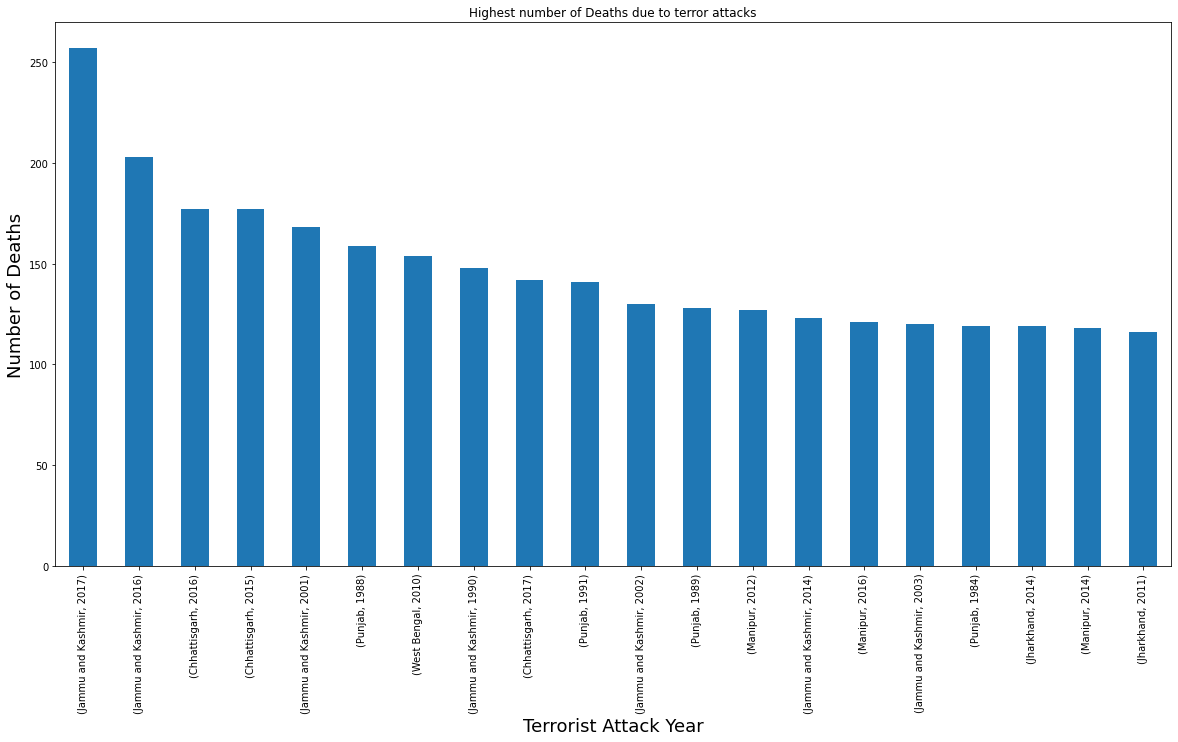

In [ ]:
plt.subplots(figsize=(20,10))
India.groupby(['State','Year'])['Kills'].count().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Highest number of Deaths due to terror attacks')
plt.xlabel('Terrorist Attack Year',fontsize=18)
plt.ylabel('Number of Deaths',fontsize=18)
plt.xticks(rotation=90)
plt.show

In [ ]:
India.groupby(['Year','State'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,Kills,Attack_Type
Year,State,,
2017,Jammu and Kashmir,257,257
2016,Jammu and Kashmir,203,204
2015,Chhattisgarh,177,180
2016,Chhattisgarh,177,180
2001,Jammu and Kashmir,168,168
1988,Punjab,159,159
2010,West Bengal,154,154
1990,Jammu and Kashmir,148,148
2017,Chhattisgarh,142,143


# **Weapon Type**

In [ ]:
India.groupby(['Year','State','Weapon_type'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,,Kills,Attack_Type
Year,State,Weapon_type,,
2017,Jammu and Kashmir,Firearms,141,141
1988,Punjab,Firearms,118,118
2012,Manipur,Explosives,113,113
2016,Chhattisgarh,Explosives,104,104
1989,Punjab,Firearms,101,101
2013,Manipur,Explosives,96,97
2010,West Bengal,Firearms,95,95
2014,Manipur,Explosives,92,92
2001,Jammu and Kashmir,Firearms,91,91


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



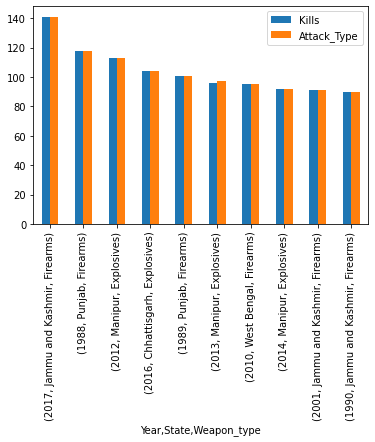

In [ ]:
India.groupby(['Year','State','Weapon_type'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

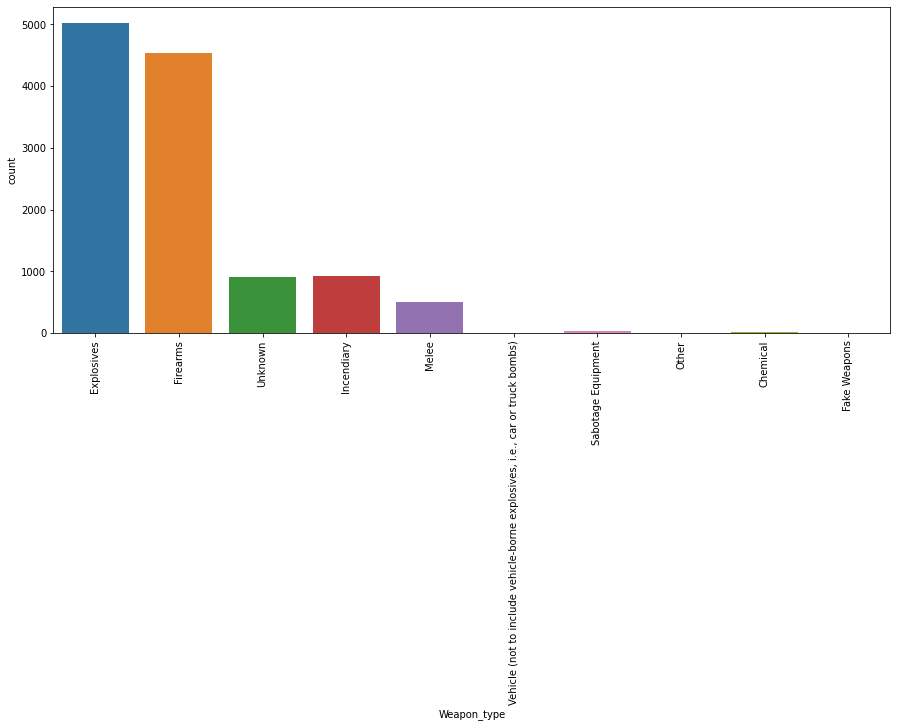

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(India['Weapon_type'])
plt.xticks(rotation=90)
plt.show

# Since from the above chart it is clear that Explosive  was mostly used in India for terrorist attacks.

# **Target**

In [ ]:
India.groupby(['Year','State','Target'])['Kills','Attack_Type'].count().sort_values(by='Kills',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Kills  Attack_Type
Year State             Target                                         
2017 Jammu and Kashmir Police                         123          123
2016 Jammu and Kashmir Police                          75           76
     Chhattisgarh      Police                          60           61
2010 West Bengal       Private Citizens & Property     60           60
2001 Jammu and Kashmir Private Citizens & Property     57           57
2015 Chhattisgarh      Police                          57           58
1988 Punjab            Private Citizens & Property     54           54
2009 Assam             Private Citizens & Property     49           49
2017 Chhattisgarh      Police                          48           48
1991 Punjab            Police                          44           44

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

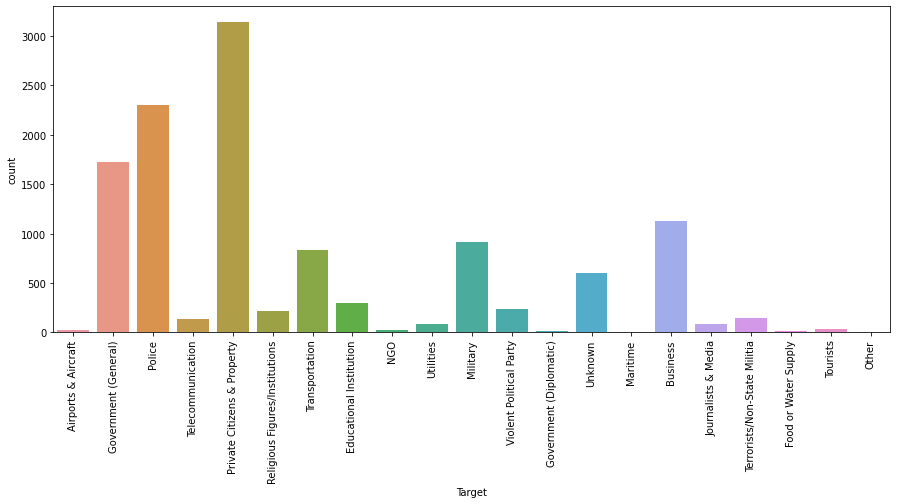

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(India['Target'])
plt.xticks(rotation=90)
plt.show

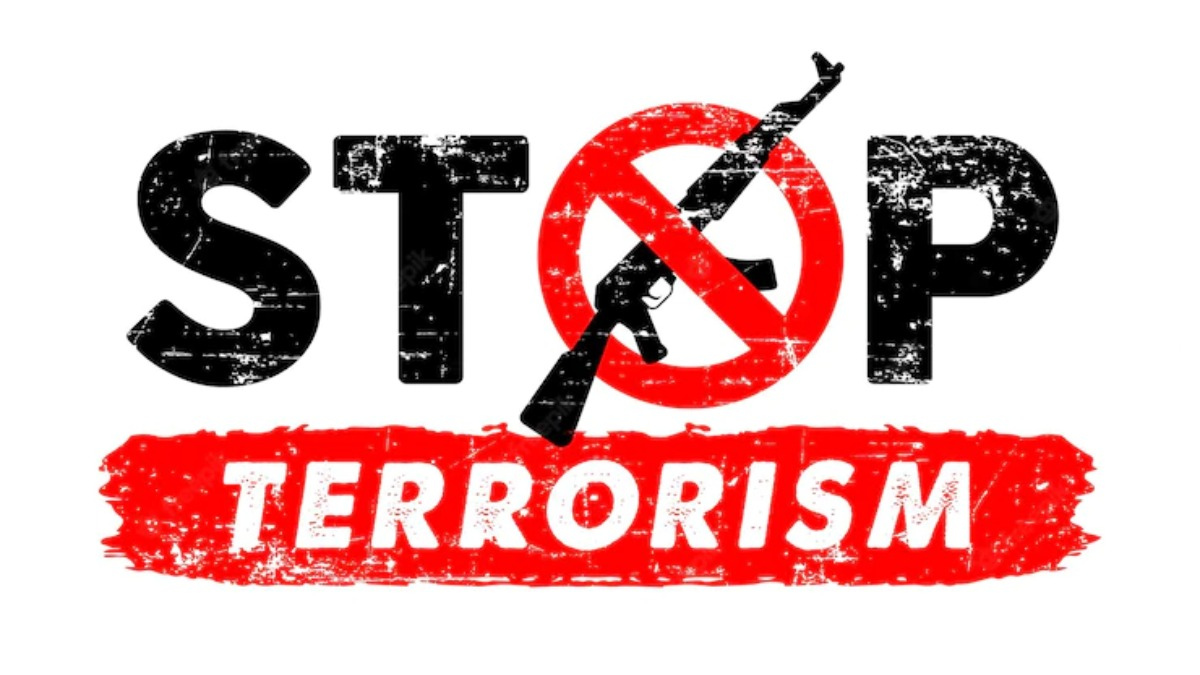

Conclusion:
Attacks were more during 2014 it almost 16903 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum i.e. 42 % with respect to terrorist attacks from 1970. But from 2014 onwards count started decreasing.
Most of the terrorist attacked carried out by unknown groups mostly in Iraq, Pakistan and Afghanistan.  While Taliban and ISIS was the biggest Terrorist Group which take parts in most of the terrorist activities.
Most of the attacks were attacked through explosives and then through firearms.
Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.
Also Baghdad dominates all the cities and it has the highest number of attacks and then Mosul, Karachi follow it.
The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.
For most of the attacks, the target is Private Citizens& property and the next Military leads.
Most of the attacks were through either Bombing or Explosion.
